# Part II - (Prosper Loan Data)
## by (Nolwazi Mlala)



## Investigation Overview


The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations. In this presentation. Many visualizations on loans's characterics will be created to study their relationship on borrowers's APR.


## Dataset Overview

The dataset included 113,937 loans' borrower APRs and characteristics. The characteristics included the original loan amount, the borrower's Prosper rating, the loan term, the borrower's declared monthly income, as well as several additional details including the borrower's employment status, debt-to-income ratio, current loan status, etc. Due to very large claimed monthly incomes that appeared to be outliers and missing borrower APR data, 352 data points were eliminated from the analysis.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the borrower rate

> The distribution of borrower rate looks nomarly distributed. A small peak centered at 0.1, a large peak centered at 0.15. There is also a sharp peak around 0.3. 

> 

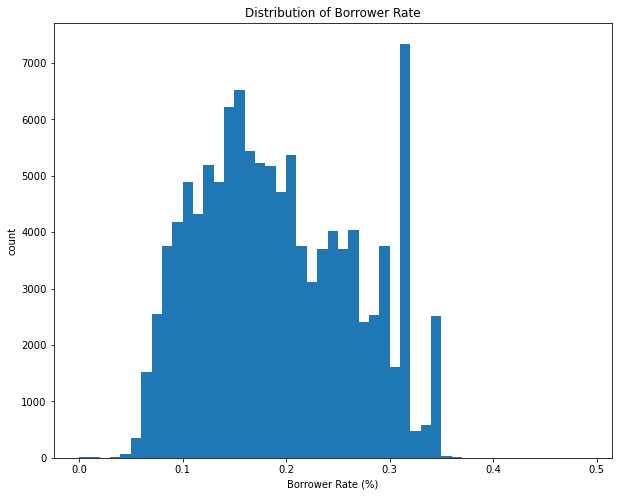

In [4]:
# Plot the distribution of BorrowerRate
rate_bins = np.arange(df.BorrowerRate.min(), df.BorrowerRate.max(), 0.01)

plt.figure(figsize = [10, 8])

plt.hist(data=df, x='BorrowerRate', bins=rate_bins)
plt.xlabel('Borrower Rate (%)');
plt.ylabel('count')
plt.title('Distribution of Borrower Rate');

## BorrowerAPR vs ProsperScore

Comparing borrower APR with ProsperScore , the borrower APR declines when the scores increase. The lowest APRs are offered by borrowers with the highest ProsperScore. It implies that the borrower APR is significantly impacted by the Prosper Score.

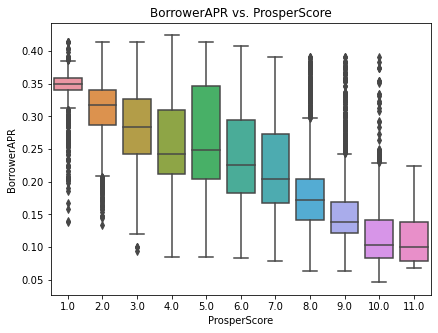

In [13]:
plt.figure(figsize = [15, 5]) 



plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR',)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

In [18]:
# replace NC with HR
df['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# fill NA with empty strings
df['ProsperRating (Alpha)'].fillna("", inplace = True)
df['CreditGrade'].fillna("", inplace = True)

# combine credit ratings
df['ProsperRatingCombined'] = df['ProsperRating (Alpha)'] + df['CreditGrade']

# drop rows with no credit ratings
df = df.query(' ProsperRatingCombined != ""')

# check values
df['ProsperRatingCombined'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     16733
AA     8881
HR     6935
Name: ProsperRatingCombined, dtype: int64

In [21]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['ProsperRatingCombined'] = df['ProsperRatingCombined'].astype(ordered_var)

## Correlation between variables
There is a weak correlation between the variables with a fair negative correlation between borrower Api and Prosper Score if -0.668.



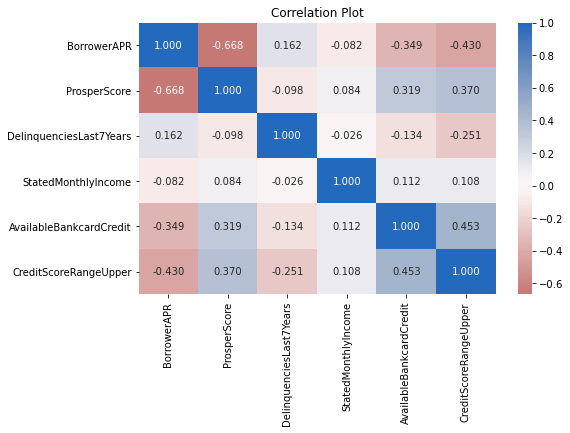

In [14]:
# correlation plot 

num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sns.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

## Observed Relationships
This grid makes it easier to compare the BorrowerAPR and ProsperScore based on various letter ratings. According to the patterns, debtors with the lowest HR have the highest APR. Borrowers with an A(A) rating have reduced APRs. Based on their ratings and scores, this visualization separates several groups of people according to the APR they obtained.

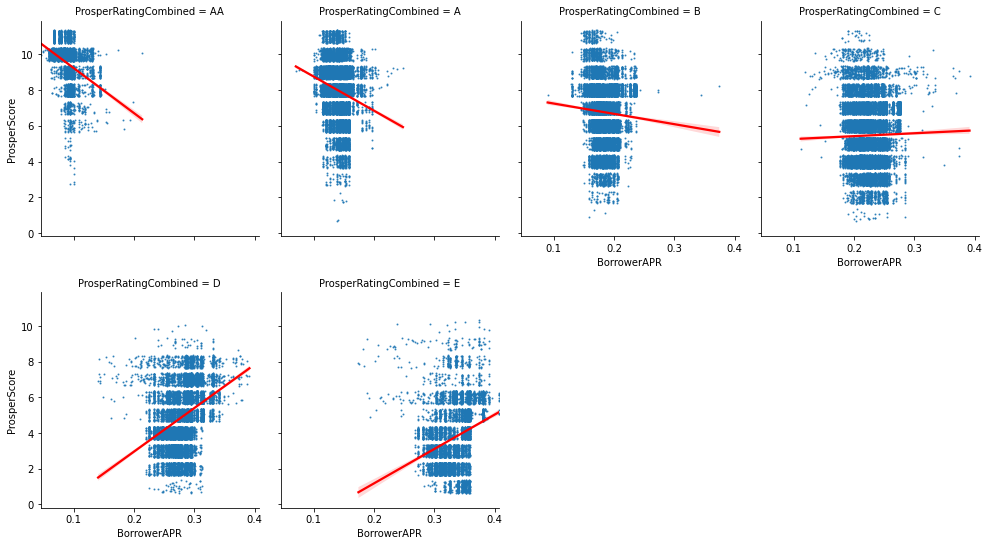

In [22]:
grid = sns.FacetGrid(data = df, col = 'ProsperRatingCombined', col_wrap = 4, size = 3)
grid.map(sns.regplot, 'BorrowerAPR', 'ProsperScore', y_jitter = 0.35, 
         scatter_kws = {'s':1},  line_kws ={'color':'red'})
grid.set_xlabels('BorrowerAPR')
grid.set_ylabels('ProsperScore')
grid.fig.set_size_inches(14,8)
plt.show();

## Conclusion

Many variables are shown to be adversely connected to BorrowerAPR from all of the aforementioned visualizations made from univariate to multivariate exploration, however ProsperScore shows the biggest negative relationship.